In [2]:
#     (1.a) [15] For each row of the table, assume that the threshold of probability for predicting
# class P is the probability in that row (see Example 8.11 on page 375 of the textbook for
# further description), determine the numbers of true positives (TP), false positives (FP),
# true negatives (TN), false negatives (FN) the true positive rate (TPR) and false positive
# 3rate (FPR) of the entire set of tuples.

from google.colab import files
uploaded = files.upload()

Saving Data Mining HWK 07 - 1A.csv to Data Mining HWK 07 - 1A.csv


In [4]:
#     (1.a) Displaying the sheet

import pandas as pd
sheet = pd.read_csv("Data Mining HWK 07 - 1A.csv")
sheet

,tupleID,actual class,probability,TP,FP,TN,FN,TPR,FPR
0,1,P,0.95,1,0,5,4,0.2,0.0
1,2,N,0.85,1,1,4,4,0.2,0.2
2,3,P,0.78,2,1,4,3,0.4,0.2
3,4,P,0.66,3,1,4,2,0.6,0.2
4,5,N,0.60,3,2,3,2,0.6,0.4
5,6,P,0.55,4,2,3,1,0.8,0.4
6,7,N,0.53,4,3,2,1,0.8,0.6
7,8,N,0.52,4,4,1,1,0.8,0.8
8,9,N,0.51,4,5,0,1,0.8,1.0
9,10,P,0.41,5,5,0,0,1.0,1.0


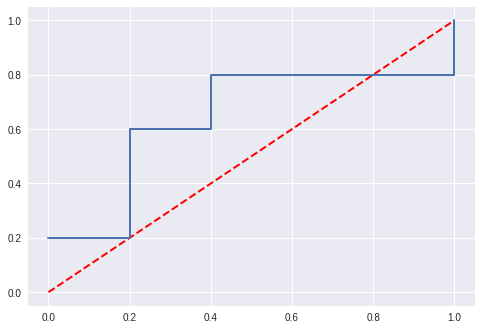

In [5]:
#     (1.b) [15] Plot the ROC curve for the data (by hand drawing or using a Python notebook).

from sklearn import metrics
from matplotlib import pyplot as plt

fpr = [0, .2, .2, .2, .4, .4, .6, .8, 1, 1]
tpr = [.2, .2, .4, .6, .6, .8, .8, .8, .8, 1]

x = [0.0, 1.0]
plt.plot(x, x, linestyle='dashed', color='red', linewidth=2, label='random')

plt.plot(fpr, tpr, linewidth=2)

In [7]:
#     (2.a) [15] In each round, a training set and a testing set are determined based on the 10-fold
# cross-validation method, and then the same training set is used to build the two models,
# and the same testing set is used to obtain errors for the two models.


import numpy as np
from statsmodels.stats.weightstats import ttest_ind

m1 = [30.5, 32.2, 20.7, 20.6, 31.0, 41.0, 27.7, 26.0, 21.5, 26.0]
m2 = [22.4, 14.5, 22.4, 19.6, 20.7, 20.4, 22.1, 19.4, 16.2, 35.0]

ttest = ttest_ind(m1, m2)

ttest

(2.437567141225827, 0.02538670824824204, 18.0)

In [9]:
#     (2.b) [15] The models are built and tested independently. A ten-round 10-fold method is first
# applied to M1 to obtain the first row in the table. A second ten-round 10-fold method
# is then applied to M2to obtain the second row in the table.

from scipy.stats import ttest_rel

deg_free = (len(m1) + len(m2)) - 1
print("Degrees of freedom :" , deg_free)

t = ttest_rel(m1, m2)
t

Degrees of freedom : 19


Ttest_relResult(statistic=2.344421419296965, pvalue=0.043702633095373596)

**Conclusion for #2 **

Since in both cases our t value (for both pair-wise and independent t tests) is lower than the critical value  3.579 (given a signifigance of .001 and 19 degrees of freedom) we can conclude that in both cases neither model is signifigantly better than the other. 

In [10]:
#     3. [40] Write a Python Jupyter notebook that performs a synchronized ten rounds 10-fold cross
# validation tests to obtain the classification accuracy scores for the Naive Bayesian and the
# AdaBoost classifiers learned from the dataset given in hwk07.csv, in which column H is the
# class label. Specifically, in each round, the same training set should be used to train the
# classifiers, and the same testing set should be used to measure the classification accuracy
# scores. Your program should use functions from the SciKit-Learn to create random folds, to
# learn classifiers, to test the classifiers and and to calculate classification accuracy scores.


# Upload csv
from google.colab import files
uploaded = files.upload()

Saving hwk07.csv to hwk07.csv


In [16]:
#     3. Naive Bayesian and AdaBoost

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

#load the csv file
df = pd.read_csv("hwk07.csv")

#Initialize Gaussian Naive Bayes
clf = GaussianNB()

# Split-out validation dataset
used_features =[
    "A",
    "B",
    "C",
    "D",
    "E",
    "F",
    "G"
]
X = df[used_features]
y = df['H']

# One-third of data as a part of test set
validation_size = 0.33

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=int(time.time()))

# Test options and evaluation metric
scoring = 'accuracy'

depth = []

#Model Performance
#setting performance parameters : 10 times 10 fold
for i in range(10):
  # Fitting the training set
  clf.fit(X_train, Y_train)
  
  # Predict and accuracy 
  predictions = clf.predict(X_test)
  score = clf.score(X_test, Y_test)
  
  # K Fold Cross Validation
  kfold = model_selection.KFold(n_splits=10, random_state=int(time.time()) )
  cv_results = model_selection.cross_val_score(clf, X_train, Y_train, cv=kfold)
  depth.append((i, cv_results.mean()))
  #print(cv_results.mean())
  #kf = KFold(n_splits = 10)

print("Naive Bayesian : ")
print(depth)

# Create adaboost classifer object
abc = AdaBoostClassifier()

# Train Adaboost Classifer
abc.fit(X_train, Y_train)

depth2 = []

for i in range(10):
  kfold = model_selection.KFold(n_splits=10, random_state=int(time.time()))
  cv_results = model_selection.cross_val_score(abc, X_train, Y_train, cv=kfold)
  depth2.append((i, cv_results.mean()))

print("\nAdaBoost : ")
print(depth2)

Naive Bayesian : 
[(0, 0.9195187165775401), (1, 0.9195187165775401), (2, 0.9195187165775401), (3, 0.9195187165775401), (4, 0.9195187165775401), (5, 0.9195187165775401), (6, 0.9195187165775401), (7, 0.9195187165775401), (8, 0.9195187165775401), (9, 0.9195187165775401)]

AdaBoost : 
[(0, 0.8808377896613191), (1, 0.8808377896613191), (2, 0.8808377896613191), (3, 0.8808377896613191), (4, 0.8808377896613191), (5, 0.8808377896613191), (6, 0.8808377896613191), (7, 0.8808377896613191), (8, 0.8808377896613191), (9, 0.8808377896613191)]
